In [1]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
print('train_images         :',mnist.train.images.shape,
     'labels:',mnist.train.labels.shape)
print('validation_images         :',mnist.validation.images.shape,
     'labels:',mnist.validation.labels.shape)
print('test_images         :',mnist.test.images.shape,
     'labels:',mnist.test.labels.shape)

('train_images         :', (55000, 784), 'labels:', (55000, 10))
('validation_images         :', (5000, 784), 'labels:', (5000, 10))
('test_images         :', (10000, 784), 'labels:', (10000, 10))


In [3]:
def layer(output_dim,input_dim,inputs,activation=None):
    W = tf.Variable(tf.random_normal([input_dim,output_dim]))
    b = tf.Variable(tf.random_normal([1,output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [4]:
x = tf.placeholder("float",[None,784])

In [7]:
h1 = layer(output_dim=256,input_dim=784,inputs=x,activation=tf.nn.relu)

In [8]:
y_predict = layer(output_dim=10,input_dim=256,inputs=h1,activation=None)

In [9]:
y_label = tf.placeholder("float",[None,10])

In [10]:
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict,labels=y_label))

In [11]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

In [12]:
correct_prediction = tf.equal(tf.argmax(y_label,1),tf.argmax(y_predict,1))

In [13]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

In [18]:
trainEpochs = 15
batchSize = 100
totalBatchs = int(mnist.train.num_examples/batchSize)
loss_list = [];epoch_list=[];accuracy_list=[]
from time import time
startTime = time()

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [19]:
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x,batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x, y_label: batch_y})
    loss,acc = sess.run([loss_function,accuracy],feed_dict={x:mnist.validation.images,
                                                           y_label:mnist.validation.labels})
    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)
    print("Train Epoch:",'%02d' % (epoch+1), "Loss=","{:.9f}".format(loss)," Accuracy=",acc)
duration = time() -startTime
print("Train Finished takes:",duration)

('Train Epoch:', '01', 'Loss=', '6.681870937', ' Accuracy=', 0.84439999)
('Train Epoch:', '02', 'Loss=', '4.440818310', ' Accuracy=', 0.88599998)
('Train Epoch:', '03', 'Loss=', '3.440905094', ' Accuracy=', 0.90100002)
('Train Epoch:', '04', 'Loss=', '2.776959658', ' Accuracy=', 0.91479999)
('Train Epoch:', '05', 'Loss=', '2.397785187', ' Accuracy=', 0.92360002)
('Train Epoch:', '06', 'Loss=', '2.184586525', ' Accuracy=', 0.926)
('Train Epoch:', '07', 'Loss=', '1.973224163', ' Accuracy=', 0.93260002)
('Train Epoch:', '08', 'Loss=', '1.770235181', ' Accuracy=', 0.93540001)
('Train Epoch:', '09', 'Loss=', '1.716024399', ' Accuracy=', 0.935)
('Train Epoch:', '10', 'Loss=', '1.561098933', ' Accuracy=', 0.93940002)
('Train Epoch:', '11', 'Loss=', '1.544605613', ' Accuracy=', 0.94059998)
('Train Epoch:', '12', 'Loss=', '1.468226194', ' Accuracy=', 0.94400001)
('Train Epoch:', '13', 'Loss=', '1.425974607', ' Accuracy=', 0.94419998)
('Train Epoch:', '14', 'Loss=', '1.370801330', ' Accuracy=', 

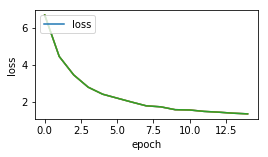

In [22]:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list,loss_list,label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'],loc='upper left')
plt.show()

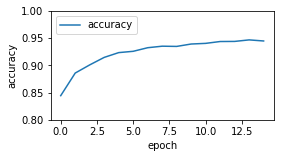

In [23]:
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list,accuracy_list,label='accuracy')
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'],loc='upper left')
plt.show()

In [24]:
prediction_result = sess.run(tf.argmax(y_predict,1),feed_dict={x:mnist.test.images})

In [25]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [30]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:nuum=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(np.reshape(images[idx],(28,28)),cmap='binary')
        title="label=" +str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

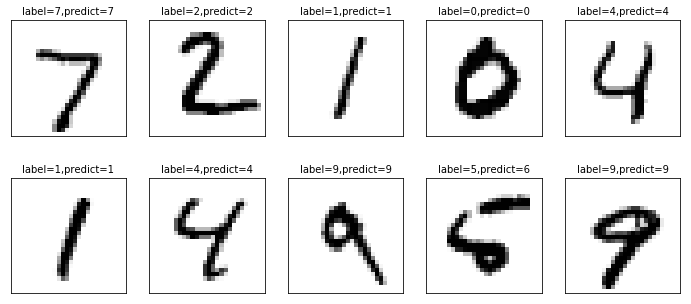

In [31]:
plot_images_labels_prediction(mnist.test.images,mnist.test.labels,prediction_result,0)